# Introduction to Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Generate Some Data

# How Many Samples?
n = 2000

# Create an artificial INDEPENDANT Variable
x = np.random.sample(n)*20

# Add 50 to each sample 
a = np.random.sample(n)*20 + 50

# Set Your Slope 
b = 3.5

# Calculate your DEPENDANT Variable 
y = b*x + a

# We don't add the random error to our dataset, in real life it is unknown
# We also don't know b apriori. b is exactly what we want to find
# And the 'expected value' of a

# Cast Into A Dataframe
df = pd.DataFrame({'feature1':x})

(2000, 2)


,feature1,target
0,2.989847,72.662684
1,19.524784,125.764686
2,7.761893,81.871556
3,12.269767,98.240457
4,11.006557,90.970664


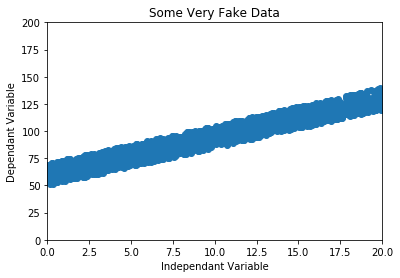

In [14]:
# Having a look at the data

# Assign Y to be our Target Variable 
df['target'] = y


fig, ax = plt.subplots()

ax.scatter(x,y)

xmin = 0
xmax = 20
ymin = 0
ymax = 200

axes = plt.gca()
axes.set_xlim([xmin,xmax])
axes.set_ylim([ymin,ymax])

plt.title("Some Very Fake Data")
plt.xlabel("Independant Variable")
plt.ylabel("Dependant Variable")


print(df.shape)
df.head()

In [15]:
# Pre-processing 

# Here We separarte our Variables 

X = df.drop('target',axis=1)
y = df['target']

### Regression in [SciKit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [16]:
from sklearn.linear_model import LinearRegression

# Setting up the LEARNER
model_skl = LinearRegression(fit_intercept=True)

# Actually LEARNING
model_skl.fit(X,y)

# Evaluating performance
r2 = model_skl.score(X,y)
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# Understanding the LEARNED model
est_a = model_skl.intercept_
est_b = model_skl.coef_
print('constant: {}'.format(round(est_a,4)))
print('coeficients: real {} vs {} estimated'.format(b,est_b.round(4)))

R2 = 0.93
constant: 60.2578
coeficients: real 3.5 vs [3.4507] estimated


### Regression in [Statsmodels](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) and its [Interpretation](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults)

In [17]:
import statsmodels.api as sm

# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))

R2 = 0.93
const       60.2578
feature1     3.4507
dtype: float64


//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Statsmodels superpower

In [18]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 2.525e+04
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:16:50   Log-Likelihood:                -6308.6
No. Observations:                2000   AIC:                         1.262e+04
Df Residuals:                    1998   BIC:                         1.263e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.2578      0.247    244.044      0.000      59.774      60.742
feature1       3.4507      0.022    158.915      0.000       3.408       3.493
==============================================================================
Omnibus:                      903.945   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.087
Skew:                           0.080   Prob(JB):                     5.58e-24
Kurtosis:                       1.878   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Your Turn!

Use the next 15 minutes to recreate (literally copy and paste as much as you can!) to attempt to predict a sheep's weight from their fatness. 

Run this model with statsmodels and plot your data!